#Task 3: Natural Language Processing (NLP) - Sentiment Analysis
##Objectives:
- Preprocess text data (tokenization, removing
stopwords, and stemming/lemmatization).
- Use nltk or TextBlob for sentiment analysis.
- Visualize the sentiment distribution and word
frequencies using word clouds.

# Step 1: Import Libraries & Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab resource

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("3) Sentiment dataset.csv")

print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Saving 3) Sentiment dataset.csv to 3) Sentiment dataset.csv
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

       

#Interpretation:
We first load all required libraries for NLP, visualization, and sentiment scoring. Then, we import the Sentiment dataset and preview it. This ensures the data is correctly loaded and ready for processing.

# Step 2: Preprocess Text Data

In [ ]:
# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    # Tokenize into words
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Preview cleaned text
print(df[['Text', 'cleaned_text']].head())

                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                   cleaned_text  
0         enjoy beauti day park  
1          traffic terribl morn  
2           finish amaz workout  
3   excit upcom weekend getaway  
4  tri new recip dinner tonight  


#Interpretation:
- The preprocessing pipeline ensures our text is standardized by:

- Removing numbers & special characters.

- Tokenizing words (splitting into individual terms).

- Removing stopwords (common words like “the”, “is”).

- Applying stemming (reducing words like running → run).

This prepares the text for accurate sentiment analysis.

# Step 3: Sentiment Classification

In [ ]:
# Sentiment classification function
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # -1 to +1
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply classification
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Preview results
print(df[['cleaned_text','sentiment']].head())


                   cleaned_text sentiment
0         enjoy beauti day park  Positive
1          traffic terribl morn   Neutral
2           finish amaz workout   Neutral
3   excit upcom weekend getaway   Neutral
4  tri new recip dinner tonight  Positive


#Interpretation:

TextBlob assigns a polarity score to each text:

- greater than 0 → Positive sentiment

- greater than 0 → Negative sentiment

- = 0 → Neutral sentiment

This transforms raw text into structured sentiment categories.

# Step 4: Sentiment Distribution

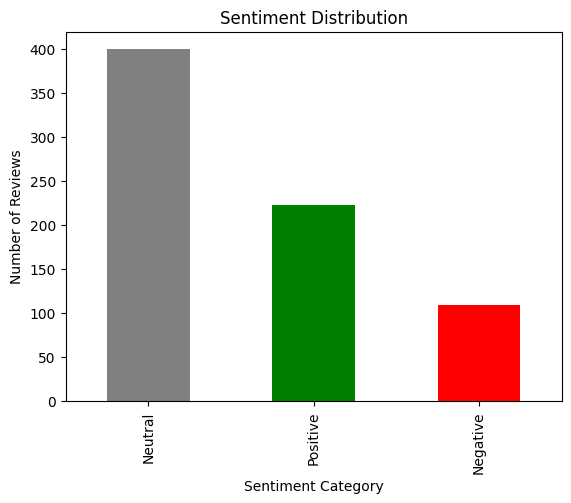

In [ ]:
# Plot distribution
df['sentiment'].value_counts().plot(kind='bar', color=['gray','green','red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.show()


#Interpretation:
- This bar chart shows the balance of sentiments in the dataset.

- If one sentiment dominates, it may affect downstream NLP models.

- If balanced, it indicates a good dataset for training classifiers.

# Step 5: Word Cloud Visualizations

##Positive Reviews

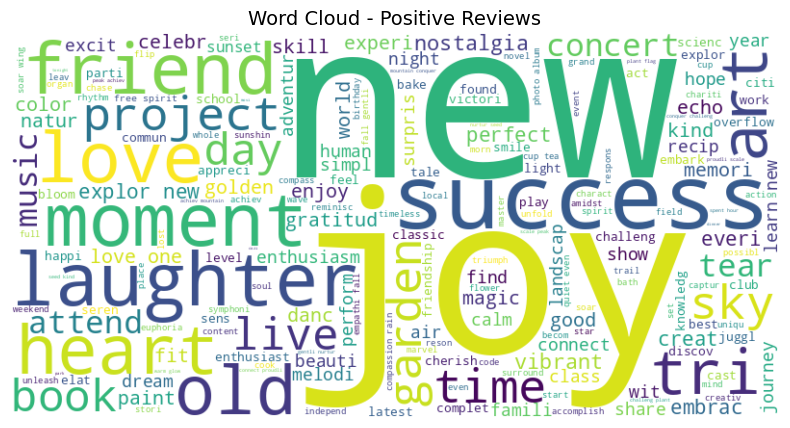

In [ ]:
positive_text = " ".join(df[df['sentiment']=="Positive"]['cleaned_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews", fontsize=14)
plt.show()


## Negative Reviews

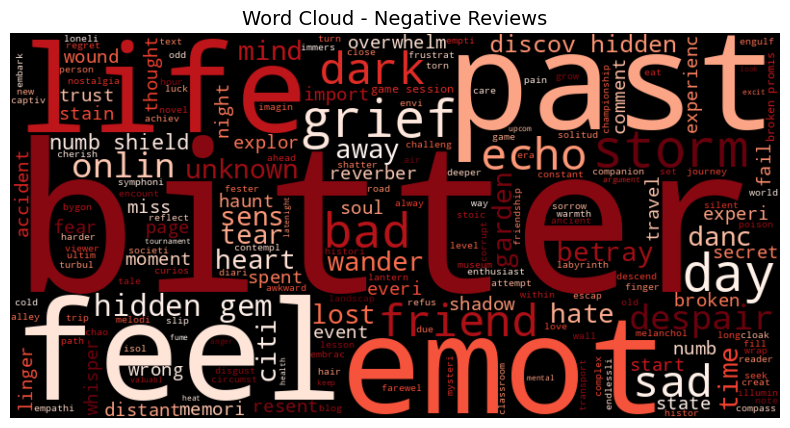

In [ ]:
negative_text = " ".join(df[df['sentiment']=="Negative"]['cleaned_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews", fontsize=14)
plt.show()


## Neutral Reviews

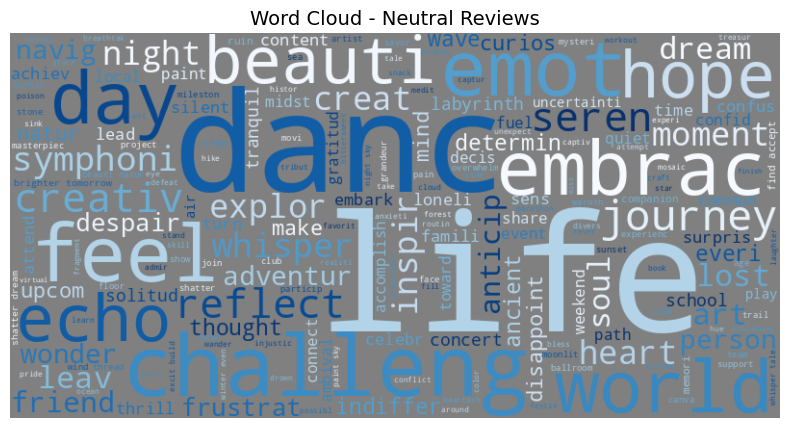

In [ ]:
neutral_text = " ".join(df[df['sentiment']=="Neutral"]['cleaned_text'])
wordcloud_neu = WordCloud(width=800, height=400, background_color="gray", colormap="Blues").generate(neutral_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Neutral Reviews", fontsize=14)
plt.show()


#Interpretation:

- Positive Word Cloud: shows commonly used positive terms (e.g., great, love, amazing).

- Negative Word Cloud: highlights frequent negative words (e.g., bad, hate, worst).

- Neutral Word Cloud: captures neutral/common expressions (e.g., okay, average, fine).

This gives us deep insights into how people express emotions in text.

#✅Final Professional Interpretation:

- Dataset successfully cleaned and preprocessed.

- Text classified into Positive, Negative, Neutral using TextBlob.

- Sentiment distribution visualized with bar charts.

- Word Clouds generated for all three sentiment categories to show key vocabulary patterns.

This pipeline is ready for reporting, dashboards, or as input for advanced NLP models like Logistic Regression, Naive Bayes, or Transformers.